## Implementación de regresión lineal en Python

En esta clase vamos a implementar regresión lineal en Python usando tres enfoques distintos:
1. Desde cero con NumPy
2. Usando Scikit-learn
3. Con análisis estadístico usando Statsmodels

También analizaremos un caso práctico de predicción de ventas con múltiples variables predictoras.

### Librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

### Generación de datos sintéticos para regresión

In [2]:
np.random.seed(42)
n_samples = 200

## Datos sintéticos con una sola variable
X_simple = np.random.normal(0, 1, n_samples) #la media es 0 y la desvest es 1
y_simple = 2 * X_simple + 1 + np.random.normal(0, 0.5, n_samples)

## Datos sintéticos con una múltiples variables
X_multiple = np.random.randn(n_samples, 3)
y_multiple = (2 * X_multiple[:, 0] - 1.5 * X_multiple[:, 1] +
              0.8 * X_multiple[:, 2] + 3 + np.random.normal(0, 0.3, n_samples))

### Método 1: Implementación desde cero con NumPy

In [3]:
class RegresionLinealManual:

    def __init__(self):
        self.coeficientes = None
        self.intercepto = None

  ######################## Función de entrenamiento ########################

    def fit(self, X, y):
      # Si X es un vector unidimensional, lo convertimos a una matriz columna
      if X.ndim == 1:
          X = X.reshape(-1, 1)

      # Agregamos una columna de unos al principio para incluir el intercepto (bias)
      X_con_intercepto = np.column_stack([np.ones(X.shape[0]), X])

      # Calculamos X transpuesta por X: parte de la fórmula de mínimos cuadrados
      XtX = np.dot(X_con_intercepto.T, X_con_intercepto)

      # Calculamos X transpuesta por y
      Xty = np.dot(X_con_intercepto.T, y)

      # Resolvemos el sistema lineal para obtener los parámetros: β = (XᵀX)^(-1) Xᵀy
      parametros = np.linalg.solve(XtX, Xty)

      # Guardamos el intercepto (primer valor del vector de parámetros)
      self.intercepto = parametros[0]

      # Guardamos los coeficientes (resto de los parámetros)
      self.coeficientes = parametros[1:]

      # Retornamos el modelo entrenado
      return self


  ######################## Función para generar predicciones ########################

    def predict(self, X):
      # Si X es un vector unidimensional, lo convertimos en una matriz columna
      # Esto asegura que se pueda multiplicar correctamente con los coeficientes
      if X.ndim == 1:
          X = X.reshape(-1, 1)

      # Calculamos las predicciones usando la fórmula: y = intercepto + X · coeficientes
      return self.intercepto + np.dot(X, self.coeficientes)


######################## Función para evaluar el modelo ########################

    def score(self, X, y):
      # Usamos el modelo para hacer predicciones con los datos de entrada
      y_pred = self.predict(X)

      # Calculamos la suma de los cuadrados del residuo (errores)
      ss_res = np.sum((y - y_pred) ** 2)

      # Calculamos la suma total de cuadrados (variación total del objetivo)
      ss_tot = np.sum((y - np.mean(y)) ** 2)

      # Retornamos el coeficiente de determinación R²
      # Mide qué tan bien el modelo explica la variabilidad de los datos
      return 1 - (ss_res / ss_tot)

In [4]:
modelo_manual = RegresionLinealManual()
modelo_manual.fit(X_simple, y_simple)
print(f"Intercepto: {modelo_manual.intercepto:.3f}")
print(f"Coeficiente: {modelo_manual.coeficientes[0]:.3f}")
print(f"R²: {modelo_manual.score(X_simple, y_simple):.3f}")

Intercepto: 1.045
Coeficiente: 2.050
R²: 0.938


### Método 2: Usando Scikit-learn

In [5]:
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_simple.reshape(-1, 1), y_simple)
print(f"Intercepto: {modelo_sklearn.intercept_:.3f}")
print(f"Coeficiente: {modelo_sklearn.coef_[0]:.3f}")
print(f"R²: {modelo_sklearn.score(X_simple.reshape(-1, 1), y_simple):.3f}")

Intercepto: 1.045
Coeficiente: 2.050
R²: 0.938


### Método 3: Statsmodels

In [6]:
# Añadimos una columna de unos a X para incluir el intercepto en el modelo
X_con_constante = sm.add_constant(X_multiple)

# Creamos y entrenamos el modelo de regresión lineal con Statsmodels (OLS = Mínimos Cuadrados Ordinarios)
modelo_stats = sm.OLS(y_multiple, X_con_constante).fit()

# Mostramos un resumen estadístico completo del modelo: coeficientes, errores estándar, p-valores, R², etc.
modelo_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     4701.
Date:                Fri, 01 Aug 2025   Prob (F-statistic):          2.93e-182
Time:                        19:10:39   Log-Likelihood:                -46.283
No. Observations:                 200   AIC:                             100.6
Df Residuals:                     196   BIC:                             113.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0385      0.022    139.306      0.000       2.996       3.082
x1             1.9621      0.021     92.802      0.000       1.920       2.004
x2            -1.4841      0.022    -68.111      0.000      -1.527      -1.441
x3             0.8134      0.023     34.886      0.000       0.767       0.859
==============================================================================
Omnibus:                        1.137   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.031
Skew:                          -0.176   Prob(JB):                        0.597
Kurtosis:                       2.993   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualización de resultados

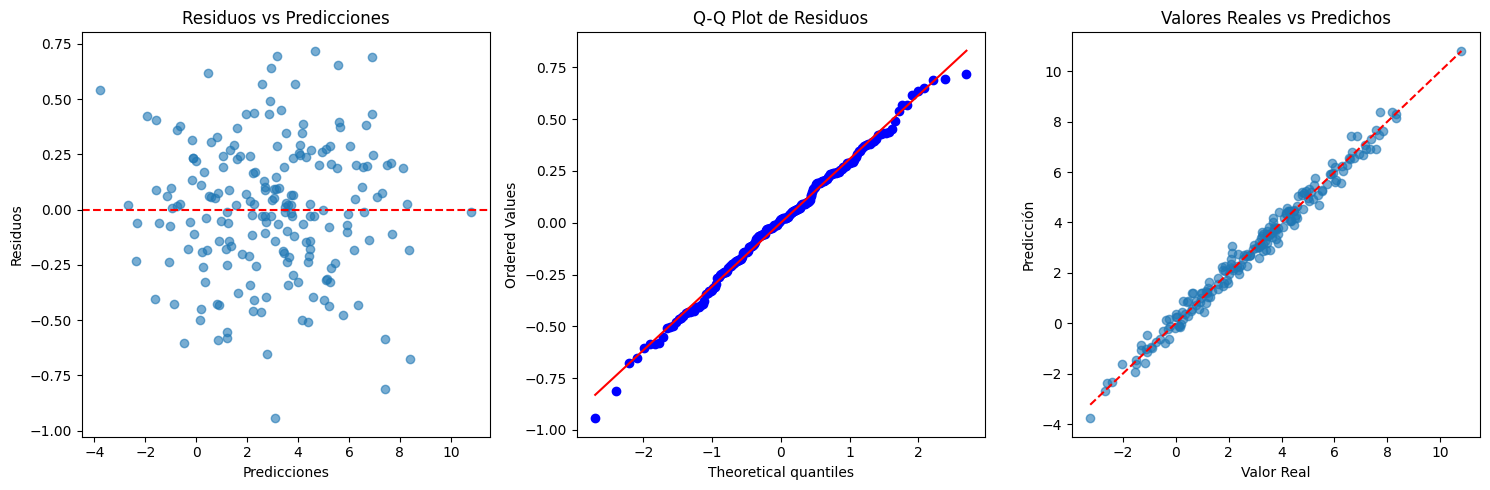

In [8]:
# Predicciones y residuos para regresión múltiple
y_pred_multiple = modelo_sklearn.fit(X_multiple, y_multiple).predict(X_multiple)
residuos = y_multiple - y_pred_multiple

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Residuos vs predicciones (Homocedasticidad)
axes[0].scatter(y_pred_multiple, residuos, alpha=0.6)
axes[0].axhline(0, color='r', linestyle='--')
axes[0].set_title('Residuos vs Predicciones')
axes[0].set_xlabel('Predicciones')
axes[0].set_ylabel('Residuos')

# Gráfico 2: Q-Q Plot (Normalidad de residuos)
stats.probplot(residuos, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot de Residuos')

# Gráfico 3: Real vs Predicho (Calidad del ajuste)
axes[2].scatter(y_multiple, y_pred_multiple, alpha=0.6)
axes[2].plot([y_multiple.min(), y_multiple.max()], [y_multiple.min(), y_multiple.max()], 'r--')
axes[2].set_title('Valores Reales vs Predichos')
axes[2].set_xlabel('Valor Real')
axes[2].set_ylabel('Predicción')

plt.tight_layout()
plt.show()


## Evaluación de supuestos
*   **HOMOCEDASTICIDAD (residuos vs predicciones)**

  El gráfico muestra residuos dispersos de forma relativamente aleatoria alrededor de cero, sin formar un patrón visible.
Se cumple el supuesto de varianza constante (homocedasticidad).

*   **NORMALIDAD DE RESIDUOS (Q-Q plot)**

  Los residuos están alineados casi perfectamente sobre la línea diagonal.
Se cumple el supuesto de normalidad de los errores.

*   **CALIDAD DEL AJUSTE (real vs predicho)**

  Los puntos se alinean muy bien sobre la diagonal, indicando que el modelo predice con gran precisión.
Muy buen ajuste del modelo a los datos.



